Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [3]:
# Read New York City apartment rental listing data
import pandas as pd
apartments = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert apartments.shape == (49352, 34)

In [4]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
apartments = apartments[(apartments['price'] >= 1375) & (apartments['price'] <= 15500) & 
        (apartments['latitude'] >=40.57) & (apartments['latitude'] < 40.99) &
        (apartments['longitude'] >= -74.1) & (apartments['longitude'] <= -73.38)]

In [5]:
apartments.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


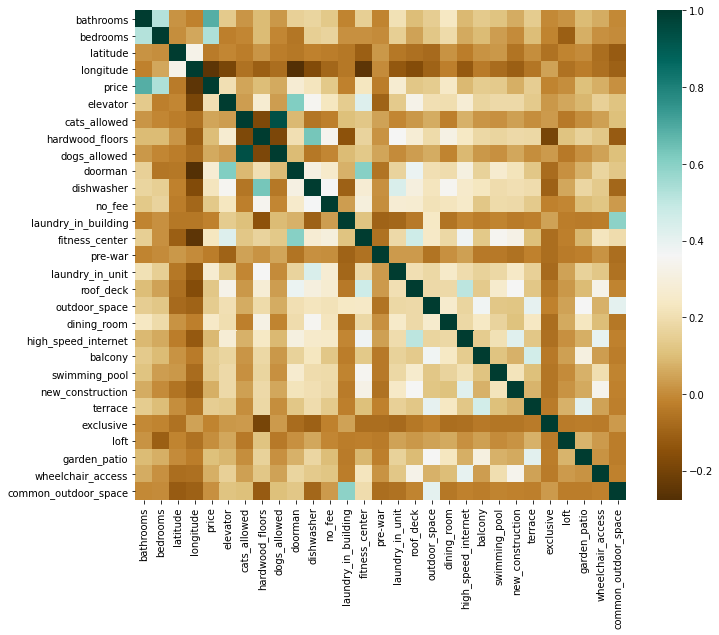

In [11]:
# Let's get a sense for which columns correlate
import seaborn as sms
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sms.heatmap(apartments.corr(), cmap='BrBG')

# Some noteworthy ones:
# dogs_allowed vs cats_allowed
# common_outdoor_space vs laundry_in_building
# doorman vs elevator

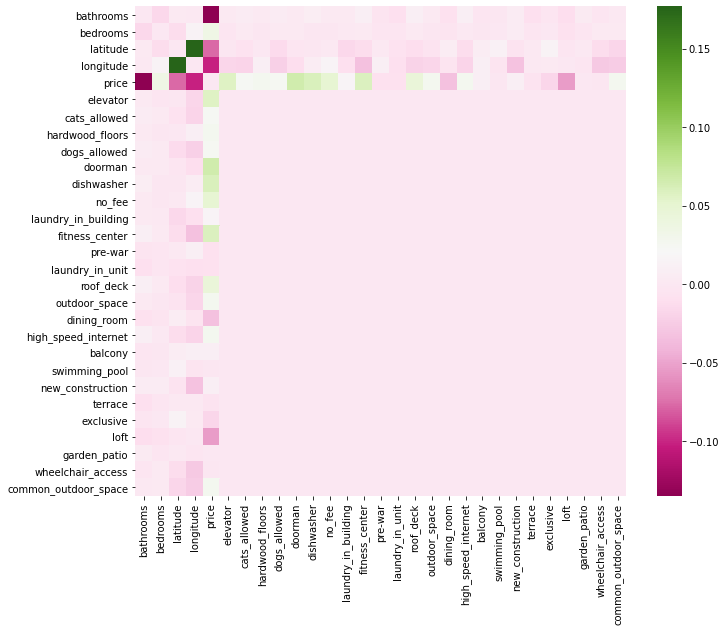

In [9]:
# Let's get a sense for which columns correlate
import seaborn as sms
import matplotlib.pyplot as plt

plt.figure(figsize=(11,9))
sms.heatmap(apartments.corr(method='spearman')-apartments.corr(method='pearson'), cmap='PiYG')

In [ ]:
# Okay, most of those columns are either 0 or 1, or words.
# Lets trim this down to numberic columns with more than 2 unique values
numeric_columns = []
for column_name in apartments.columns:
  col = apartments[column_name]
  if (col.dtype != 'object') and (len(col.unique()) > 2):
    numeric_columns.append(column_name)
numeric_columns

['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price']

In [ ]:
# Get the shape before and after dropping NaNs
num_apts = apartments[numeric_columns]
print('Numeric columns with nans are shaped',num_apts.shape)
num_apts.dropna(inplace=True)
print('Numeric columns without nans are shaped',num_apts.shape)

# Turns out there are no nans

Numeric columns with nans are shaped (48818, 5)
Numeric columns without nans are shaped (48818, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


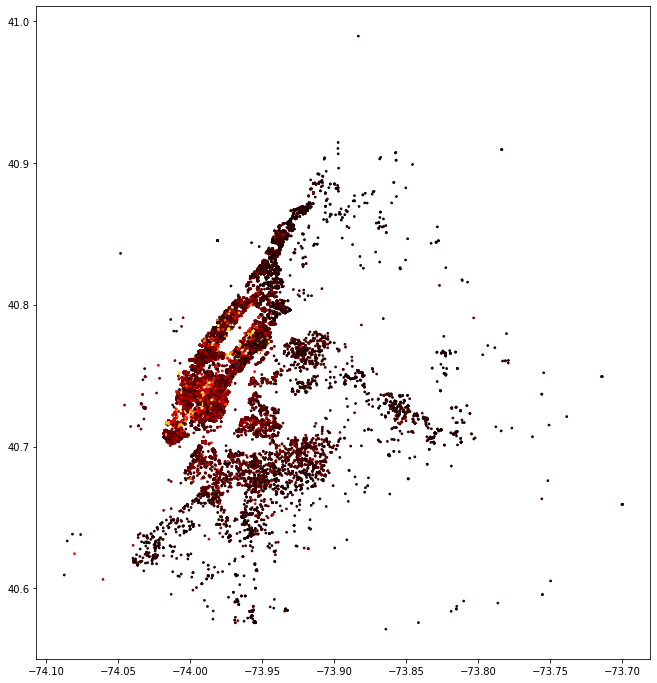

In [ ]:
# I can't resist making a map when there's latitude and longitude columns!
plt.figure(figsize=(11,12))
plt.scatter(num_apts.longitude, num_apts.latitude,c=num_apts.price,cmap='hot',s=3)

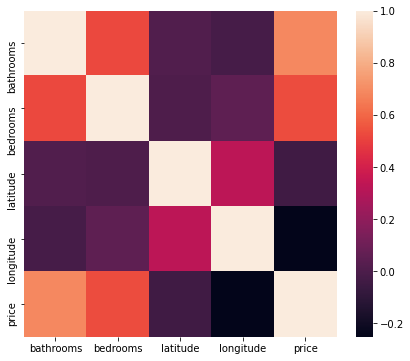

In [ ]:
# Let's try this again
import seaborn as sms
plt.figure(figsize=(7,6))
sms.heatmap(num_apts.corr())

In [ ]:
import numpy as np

# Now lets subset the data into X and y
y_apt = apartments['price']
X_apt = apartments['bathrooms']
X_apt = X_apt[:, np.newaxis]

# If you want to split by price vs the rest
# numeric_columns.remove('price')
# X_apt = apartments[numeric_columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
# Imports
from sklearn.linear_model import LinearRegression

# Instantiate the class (with default parameters)
model = LinearRegression()

# Fit the model
model.fit(X_apt, y_apt)

# Slope (also called the model coefficient)
print('Coefficients =',model.coef_)

# Intercept
print('Intercept =',model.intercept_)

# In equation form
print('price =',model.coef_[0],'x bathrooms +',model.intercept_)

# Score the new model
print('score =',model.score(X_apt, y_apt))

Coefficients = [2573.37439508]
Intercept = 486.9045355154294
price = 2573.3743950844187 x bathrooms + 486.9045355154294
score = 0.47237711795859144


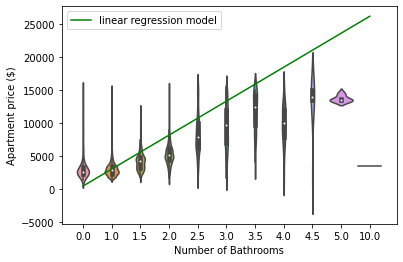

In [ ]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the line from the model coefficients
x_line = np.linspace(X_apt.min(), X_apt.max())
y_line = model.coef_*x_line + model.intercept_

# Create the figure and axes objects
fig, ax = plt.subplots(1)
sns.violinplot(x='bathrooms', y='price', data=apartments, ax=ax, label="Price")
ax.plot(x_line, y_line, color='g', label="linear regression model")

ax.set(xlabel='Number of Bathrooms', ylabel='Apartment price ($)')
ax.legend()

plt.show()

While the number of bathrooms is the highest correlating factor for apartment price, the linear model for bathrooms > price only scores 0.47 out of 1.0.